# Heart Failure Prediction EDA

## 1. 문제 정의
- 데이터 세트에는 심장 질환 발생과 관련있는 11가지 features 존재
- 11가지 임상의 특징들을 통해 환자가 심장질환을 가질지 여부 예측하기



독립변수 : Age, Sex, ChestPainType, RestingBP, Cholesterol, FastingBS, RestingECG, MaxHR, ExerciseAngina, Oldpeak, ST_Slope

종속변수 : HeartDisease

In [42]:
import numpy as np
import pandas as pd


from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## 2. 데이터 불러오기

In [3]:
df=pd.read_csv('heart.csv')
df.head()

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR   
0   40   M           ATA        140          289          0     Normal    172  \
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0

## 컬럼 살펴보기
- Age : 환자 나이
- Sex : 성별 (M = 남성, F = 여성)
- ChestPainType : 가슴 통증 유형
    -  TA: 일반 협심증, ATA: 비정형 협심증, NAP: 비혈관 통증, ASY: 무증상
- RestingBP : 휴식기 혈압( mm Hg 단위)
- Cholesterol : 혈청 콜레스테롤(mg/dl)
    - 혈청 콜레스테롤은 혈액에 있는 총 콜레스테롤의 양을 나타냄
- FastingBS : 공복 혈당
    - 1: 공복일 때 BS > 120 mg/dl, 0: 그렇지 않은 경우
- RestingECG : 휴식기 심전도 
    - Normal: 정상, ST: ST-T파 이상(T파 반전 및/또는 ST 상승 또는 우울 0.05mV 이상), LVH: Estes 기준으로 추정되거나 확실한 좌실 비대를 보임
- MaxHR : 최대 심박수 
    - 60에서 202 사이의 숫자 값
- ExerciseAngina : 운동성 협심증
    - Y: 예, N: 아니오
- Oldpeak : ST 세그먼트 하강 정도 측정 수치
    - ST 세그먼트(분절) -> 심전도 전기 그래프 중 일부 주기
    - ST 세그먼트 하강 -> ST 세그먼트 수치가 기준선 아래로 낮아 일부 심장질환의 발견 징조가 될 수 있음
- ST_Slope : 피크 운동 ST 세그먼트의 기울기
    - 기울기에 따라 심장질환의 발견 징조가 될 수 있음
    - Up: 위로, Flat: 평평하게, Down: 아래로
- HeartDisease : 심장질환 여부
    - 1: 심장질환 , 0: 정상

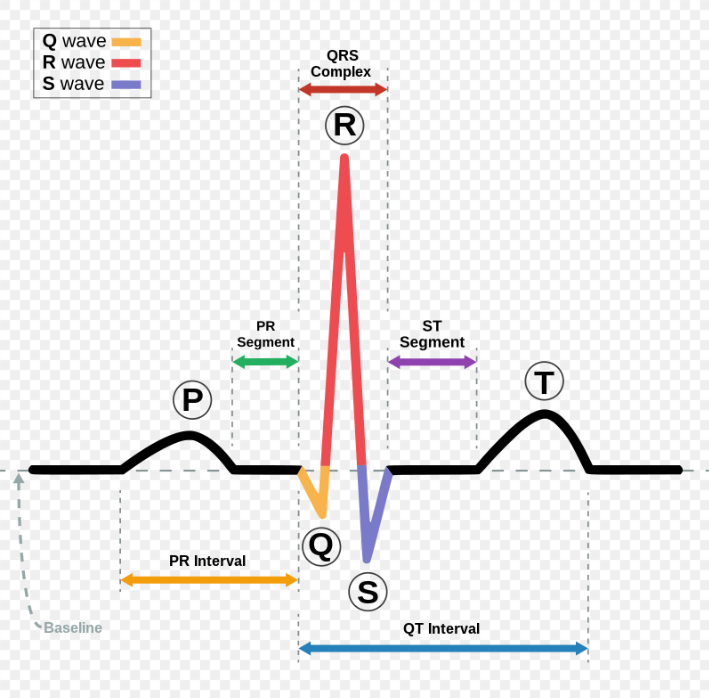

In [13]:
print(df.shape)
print(df.isnull().sum())

(918, 12)
Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


- 918행과 12열로 구성
- 결측치 부재

## 3. 데이터 전처리 및 EDA

In [5]:
#  index를 1부터로 수정
df.reset_index(drop=True)
df.reset_index()
df.index += 1
df.head()

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR   
1   40   M           ATA        140          289          0     Normal    172  \
2   49   F           NAP        160          180          0     Normal    156   
3   37   M           ATA        130          283          0         ST     98   
4   48   F           ASY        138          214          0     Normal    108   
5   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
1              N      0.0       Up             0  
2              N      1.0     Flat             1  
3              N      0.0       Up             0  
4              Y      1.5     Flat             1  
5              N      0.0       Up             0

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 1 to 918
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


- 정수형 변수 -> 6개
- 실수형 변수 -> 1개
- 범주형 변수 -> 5개
    - 범주형 변수가 많으며 추후에 연속형으로 변환 필요

In [16]:
#연속형 변수들 기술통계량 확인
df.describe()

Age   RestingBP  Cholesterol   FastingBS       MaxHR   
count  918.000000  918.000000   918.000000  918.000000  918.000000  \
mean    53.510893  132.396514   198.799564    0.233115  136.809368   
std      9.432617   18.514154   109.384145    0.423046   25.460334   
min     28.000000    0.000000     0.000000    0.000000   60.000000   
25%     47.000000  120.000000   173.250000    0.000000  120.000000   
50%     54.000000  130.000000   223.000000    0.000000  138.000000   
75%     60.000000  140.000000   267.000000    0.000000  156.000000   
max     77.000000  200.000000   603.000000    1.000000  202.000000   

          Oldpeak  HeartDisease  
count  918.000000    918.000000  
mean     0.887364      0.553377  
std      1.066570      0.497414  
min     -2.600000      0.000000  
25%      0.000000      0.000000  
50%      0.600000      1.000000  
75%      1.500000      1.000000  
max      6.200000      1.000000

In [24]:
#범주형 변수와 연속형 변수 구분
cat_col = ['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope']
con_col = ['Age','RestingBP','Cholesterol','FastingBS','MaxHR','Oldpeak']

In [18]:
#범주형 변수들 살펴보기
for i in cat_col:
    print(df[i].value_counts())
    print('===========')


Sex
M    725
F    193
Name: count, dtype: int64
ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64
RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64
ExerciseAngina
N    547
Y    371
Name: count, dtype: int64
ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: int64


### 독립변수 탐색

##### Sex

In [6]:
#남성이 78.9%, 여성이 21%로 남성 비율이 압도적으로 많음을 확인
print(df['Sex'].value_counts(normalize=True))
df['Sex'] = df['Sex'].map({'M': 0, 'F': 1})#M -> 0, F ->1 과 같이 숫자형으로 변환

Sex
M    0.78976
F    0.21024
Name: proportion, dtype: float64


##### Age

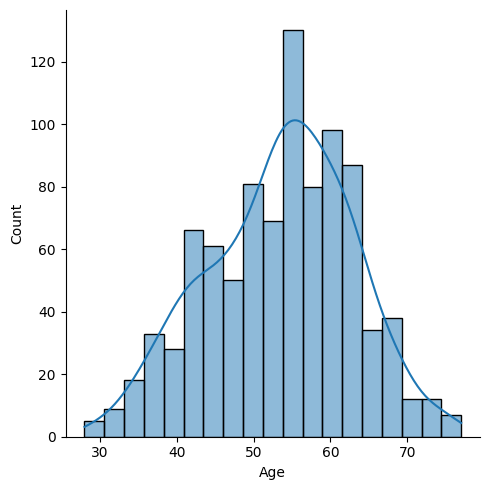

In [58]:
sns.displot(df['Age'], kde=True)
#50 ~60세의 중년이 가장 많음을 확인
#30세 이하는 매우 적음

In [7]:
#10을 기준으로 나이대 구분하는 새로운 컬럼 추가
def age_sep(a):
    if a<30:
        return '<30'
    elif a>=30 and a<40:
        return '30-40'
    elif a>=40 and a<50:
        return '40-50'
    elif a>=50 and a<60:
        return '50-60'
    elif a>=60 and a<70:
        return '60-70'
    else:
        return '>=70'

#30세 미만은 0, 30이상 40미만 1, 40이상 50미만 2, 50이상 60미만 3, 60이상 70미만 4, 70이상 5    
df['Age_group'] = df['Age'].apply(age_sep)
df['Age_group'] = df['Age_group'].map({'<30': 0,
                               '30-40': 1,
                               '40-50': 2,
                               '50-60': 3,
                               '60-70': 4,
                               '>=70': 5})

In [8]:
df[['Sex','Age','Age_group']].head()

Sex  Age  Age_group
1    0   40          2
2    1   49          2
3    0   37          1
4    1   48          2
5    0   54          3

##### ChestPainType

<Axes: xlabel='ChestPainType', ylabel='count'>

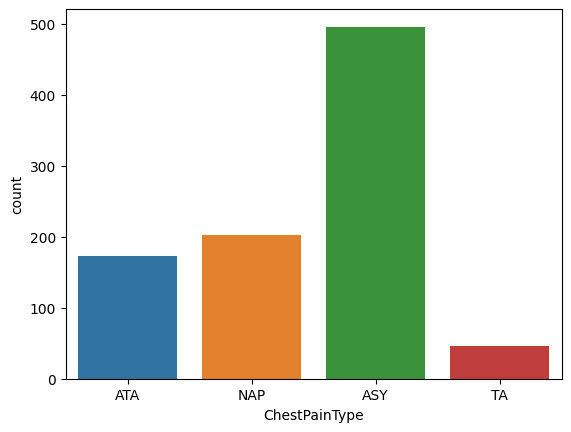

In [9]:
#ASY무증상의 빈도가 가장 높고 TA 일반협심증의 빈도가 가장 낮음
sns.countplot(x = 'ChestPainType', data=df)

In [10]:
#종속변수와의 관계를 보면
#ASY(무증상), TA(일반협심증), NAP(비혈관통증), ATA(비정형 협심증) 순으로 많다
# 즉, 심장질환 보유자 중 흉통의 증상이 무증상인 환자 비율이 가장 많음을 알 수 있음
#또한 단순 빈도로는 TA가 낮았으나 심장질환 보유여부를 고려해서 보면 2순위를 차지함
df[['ChestPainType', 'HeartDisease']].groupby(['ChestPainType'], as_index=True).mean().sort_values(by='HeartDisease', ascending=False)

HeartDisease
ChestPainType              
ASY                0.790323
TA                 0.434783
NAP                0.354680
ATA                0.138728

In [11]:
#ATA - 0, NAP - 1 ASY - 2 TA - 3으로 값 변환
df['ChestPainType'] = df['ChestPainType'].map({'ATA': 0,'NAP': 1,'ASY': 2, 'TA': 3})

In [12]:
df['ChestPainType'].head()

1    0
2    1
3    0
4    2
5    1
Name: ChestPainType, dtype: int64

##### RestingBP       

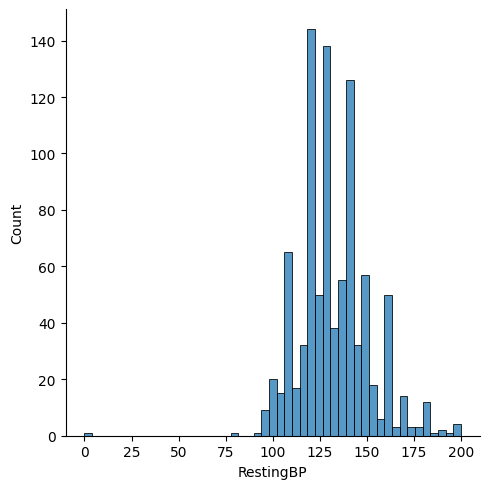

<function matplotlib.pyplot.show(close=None, block=None)>

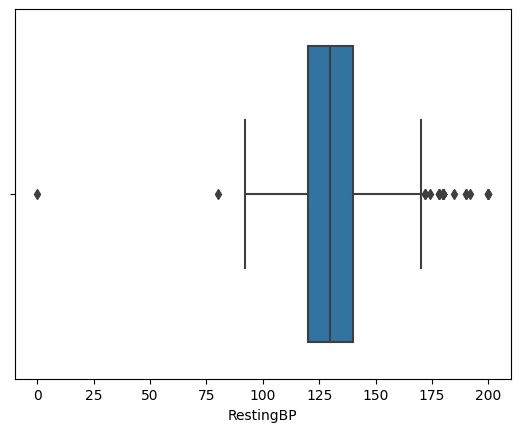

In [13]:
sns.displot(x = 'RestingBP', data=df)
plt.show()
sns.boxplot(x = 'RestingBP', data=df)
plt.show

- 대개 110 ~140 사이에 많이 분포
- 박스플롯을 보면 0의 값을 가지는 값 하나 존재 -> 이상치로 판단하여 제거

In [14]:
df = df[df['RestingBP']>0]
df['RestingBP'].min()

80

##### Cholesterol

In [15]:
df['Cholesterol'].describe()

count    917.000000
mean     199.016358
std      109.246330
min        0.000000
25%      174.000000
50%      223.000000
75%      267.000000
max      603.000000
Name: Cholesterol, dtype: float64

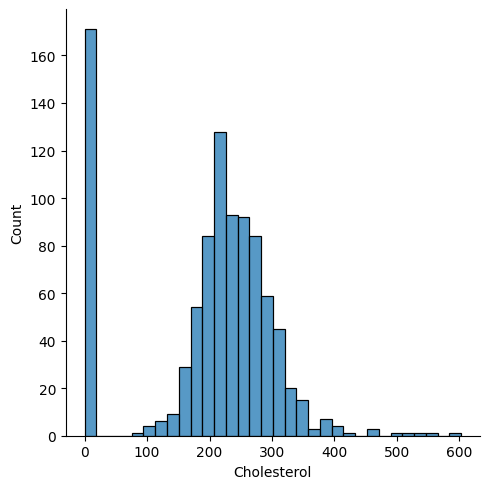

In [16]:
sns.displot(x = 'Cholesterol', data=df)
#0과 600대 값 둘다 이상치로 볼 수 없는 범위 내 있다고 판단 -> 제거 x

In [17]:
#100단위로 콜레스테롤 범위 구분하여  새 컬럼 형성
def chol_sep(ch):
    if ch>=0 and ch<100:
        return '0-100'
    elif ch>=100 and ch<200:
        return '100-200'
    elif ch>=200 and ch<300:
        return '200-300'
    elif ch>=300 and ch<400:
        return '300-400'
    elif ch>=400 and ch<500:
        return '400-500'
    elif ch>=500 and ch<600:
        return '500-600'
    else:
        return '>=600'

df['chol_group'] = df['Cholesterol'].apply(chol_sep)
df['chol_group'] = df['chol_group'].map({
    '0-100':0,
    '100-200':1,
    '200-300':2,
    '300-400':3,
    '400-500':4,
    '500-600':5,
    '>=600':6
})

In [18]:
df[['Cholesterol','chol_group']].head()

Cholesterol  chol_group
1          289           2
2          180           1
3          283           2
4          214           2
5          195           1

##### FastingBS

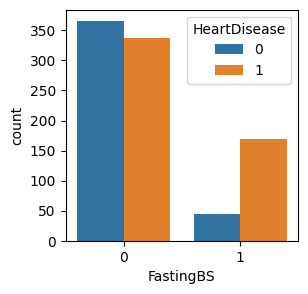

In [19]:
plt.figure(figsize=(3,3))
sns.countplot(x = 'FastingBS', hue='HeartDisease',data=df)
plt.show()

In [20]:
df[['FastingBS', 'HeartDisease']].groupby(['FastingBS'], as_index=True).mean().sort_values(by='HeartDisease', ascending=False)

HeartDisease
FastingBS              
1              0.794393
0              0.479374

공복혈당이 높은 환자 중 심장질환 보유자 비율이 높음 -> 높은 공복혈당은 주의할 요인

##### RestingECG

In [21]:
#ST(ST-T파 이상), LVH(좌실비대), Normal(정상)순
#즉 심장질환 보유자 중 휴식기 심전도가 ST-T파에 이상인 환자 비율이 높음을 알 수 있음(각 증상별 큰차이를 보이지는 않음)
df[['RestingECG', 'HeartDisease']].groupby(['RestingECG'], as_index=True).mean().sort_values(by='HeartDisease', ascending=False)

HeartDisease
RestingECG              
ST              0.657303
LVH             0.563830
Normal          0.515426

In [22]:
#Normal 0, ST 1, LVH 2로 값 변환
df['RestingECG'] = df['RestingECG'].map({'Normal': 0,'ST':1,'LVH': 2})

##### MaxHR

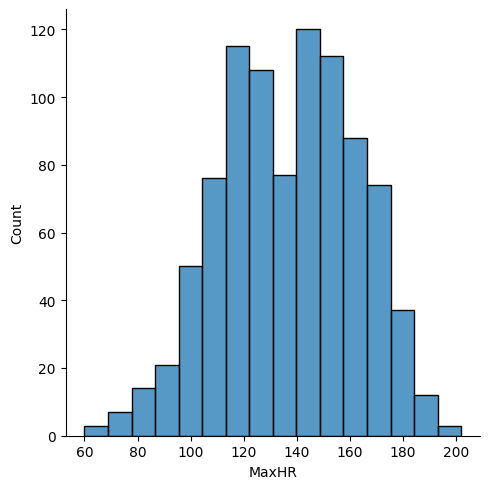

In [23]:
sns.displot(x = 'MaxHR', data=df, bins=16)
plt.show()

##### ExerciseAngina

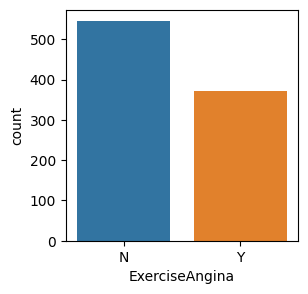

In [24]:
plt.figure(figsize=(3,3))
sns.countplot(x = 'ExerciseAngina', data=df)
plt.show()

In [25]:
#심장질환 보유자 중 운동성 협심증 보유자가 많음
df[['ExerciseAngina', 'HeartDisease']].groupby(['ExerciseAngina'], as_index=True).mean().sort_values(by='HeartDisease', ascending=False)

HeartDisease
ExerciseAngina              
Y                   0.851752
N                   0.349817

In [26]:
#운동성 협심증 미보유자 0, 보유자 1로 값변환
df['ExerciseAngina'] = df['ExerciseAngina'].map({
    'N':0,
    'Y':1
})
df['ExerciseAngina'].head()

1    0
2    0
3    0
4    1
5    0
Name: ExerciseAngina, dtype: int64

##### Oldpeak

In [27]:
df['Oldpeak'].describe()

count    917.000000
mean       0.886696
std        1.066960
min       -2.600000
25%        0.000000
50%        0.600000
75%        1.500000
max        6.200000
Name: Oldpeak, dtype: float64

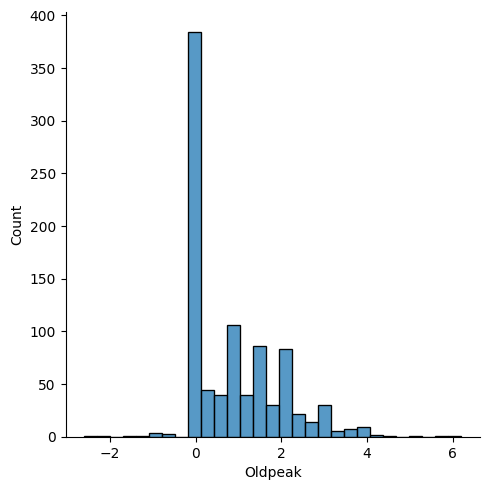

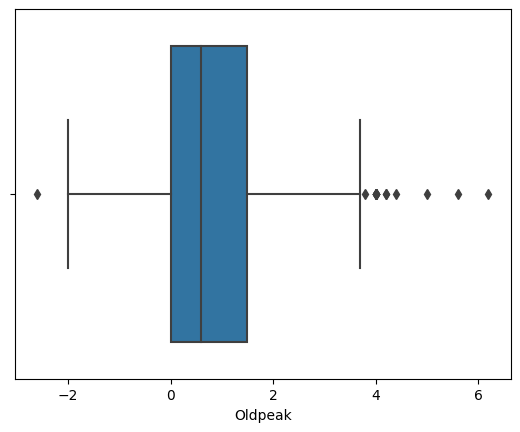

In [28]:
sns.displot(x = 'Oldpeak', data=df)
plt.show()
sns.boxplot(x = 'Oldpeak', data=df)
plt.show()

값의 분포가 고르지 않으며 이상치라 보기 힘든 값 여럿 존재 -> 범주 구분 필요

In [29]:
def op_sep(p):
    if p<-2:
        return 0
    elif p>=-2 and p<0:
        return 1
    elif p>=0 and p<2:
        return 2
    elif p>=2 and p<4:
        return 3
    elif p>=4 and p<6:
        return 4
    else:
        return 5
df['op_group'] = df['Oldpeak'].apply(op_sep)

In [30]:
df[['Oldpeak','op_group']].head()

Oldpeak  op_group
1      0.0         2
2      1.0         2
3      0.0         2
4      1.5         2
5      0.0         2

##### ST_Slope

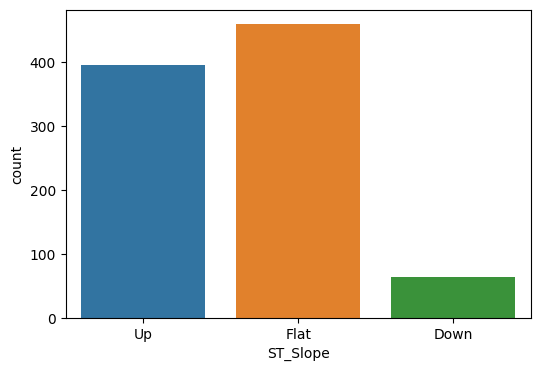

In [31]:
plt.figure(figsize=(6,4))
sns.countplot(x = 'ST_Slope', data=df)
plt.show()

In [32]:
#Flat,Down,Up 순
# 심장질환 보유자 중 ST 세그먼트 기울기가 평평한 환자 비율이 많음
df[['ST_Slope', 'HeartDisease']].groupby(['ST_Slope'], as_index=True).mean().sort_values(by='HeartDisease', ascending=False)

HeartDisease
ST_Slope              
Flat          0.827887
Down          0.777778
Up            0.197468

In [33]:
#up 0 ,flat 1, down 2로 값 변환
df['ST_Slope'] = df['ST_Slope'].map({
    'Up':0,
    'Flat':1,
    'Down':2
})
df['ST_Slope'].head()

1    0
2    1
3    0
4    1
5    0
Name: ST_Slope, dtype: int64

In [34]:
#최종 전처리 결과 확인
df.head()

Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG   
1   40    0              0        140          289          0           0  \
2   49    1              1        160          180          0           0   
3   37    0              0        130          283          0           1   
4   48    1              2        138          214          0           0   
5   54    0              1        150          195          0           0   

   MaxHR  ExerciseAngina  Oldpeak  ST_Slope  HeartDisease  Age_group   
1    172               0      0.0         0             0          2  \
2    156               0      1.0         1             1          2   
3     98               0      0.0         0             0          1   
4    108               1      1.5         1             1          2   
5    122               0      0.0         0             0          3   

   chol_group  op_group  
1           2         2  
2           1         2  
3           2         2  
4           2         2  
5           1         2

### 종속변수 탐색

심장질환 보유자 비율: 44.66%
심장질환 미보유자 비율: 55.34%


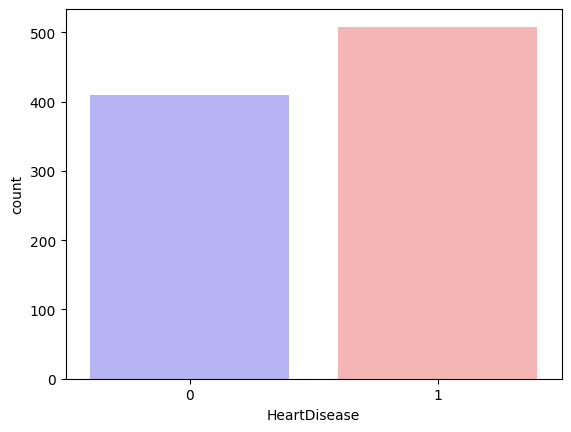

In [9]:
#종속변수 확인 --> 심장질환 보유자가 11% 가량 더 많음

noDisease = len(df[df.HeartDisease == 0])
haveDisease = len(df[df.HeartDisease == 1])
print("심장질환 보유자 비율: {:.2f}%".format((noDisease / (len(df.HeartDisease))*100)))
print("심장질환 미보유자 비율: {:.2f}%".format((haveDisease / (len(df.HeartDisease))*100)))
sns.countplot(x="HeartDisease", data=df, palette="bwr")
plt.show()

### 히트맵으로 상관관계 분석

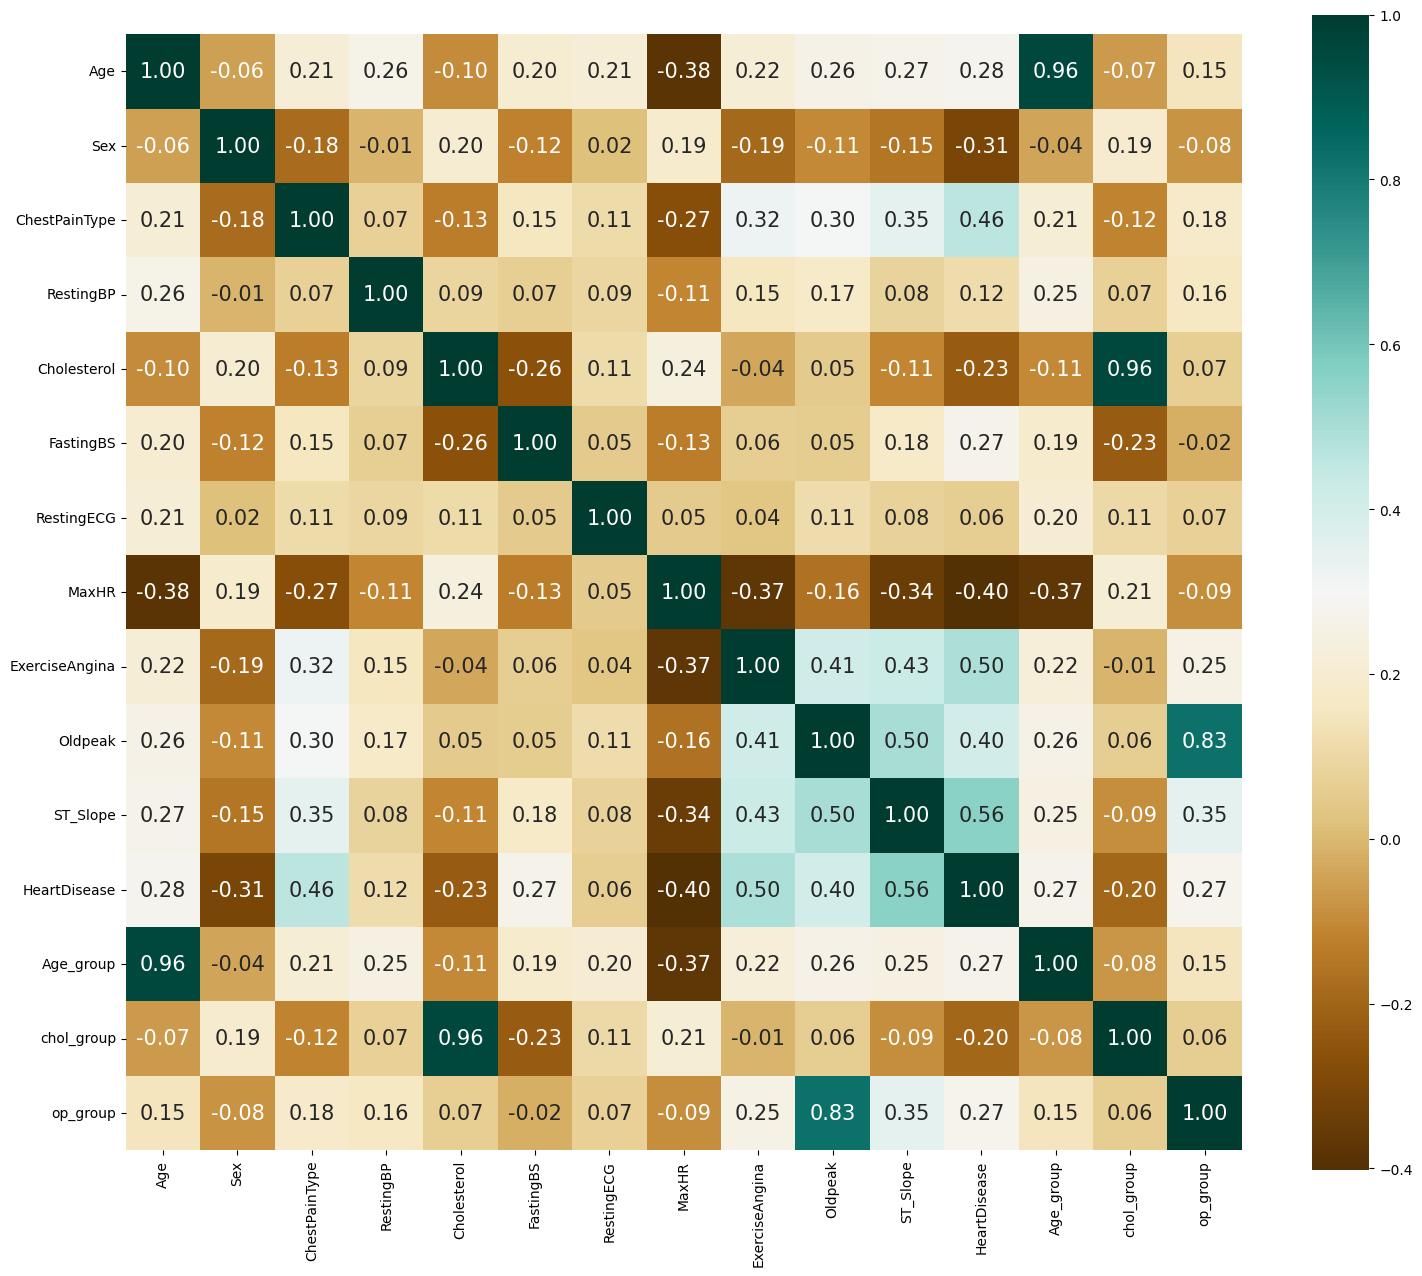

In [143]:
plt.figure(figsize=(18,15))
sns.heatmap(df.corr(), annot=True,cmap='BrBG', square=True,fmt='.2f',annot_kws={"size":15})
plt.show()

In [37]:
#양의 상관관계, 음의 상관관계 히트맵 분리
#둘다 상관관계 0.2 기준
df_corr = df.corr()
mask = np.zeros_like(df_corr)
mask[np.triu_indices_from(mask)] = True

df_corr_pos = df_corr[df_corr>=0.2]
df_corr_neg = df_corr[(df_corr <= -0.2) & (df_corr <= 1.0)| (df_corr == 1.0)]

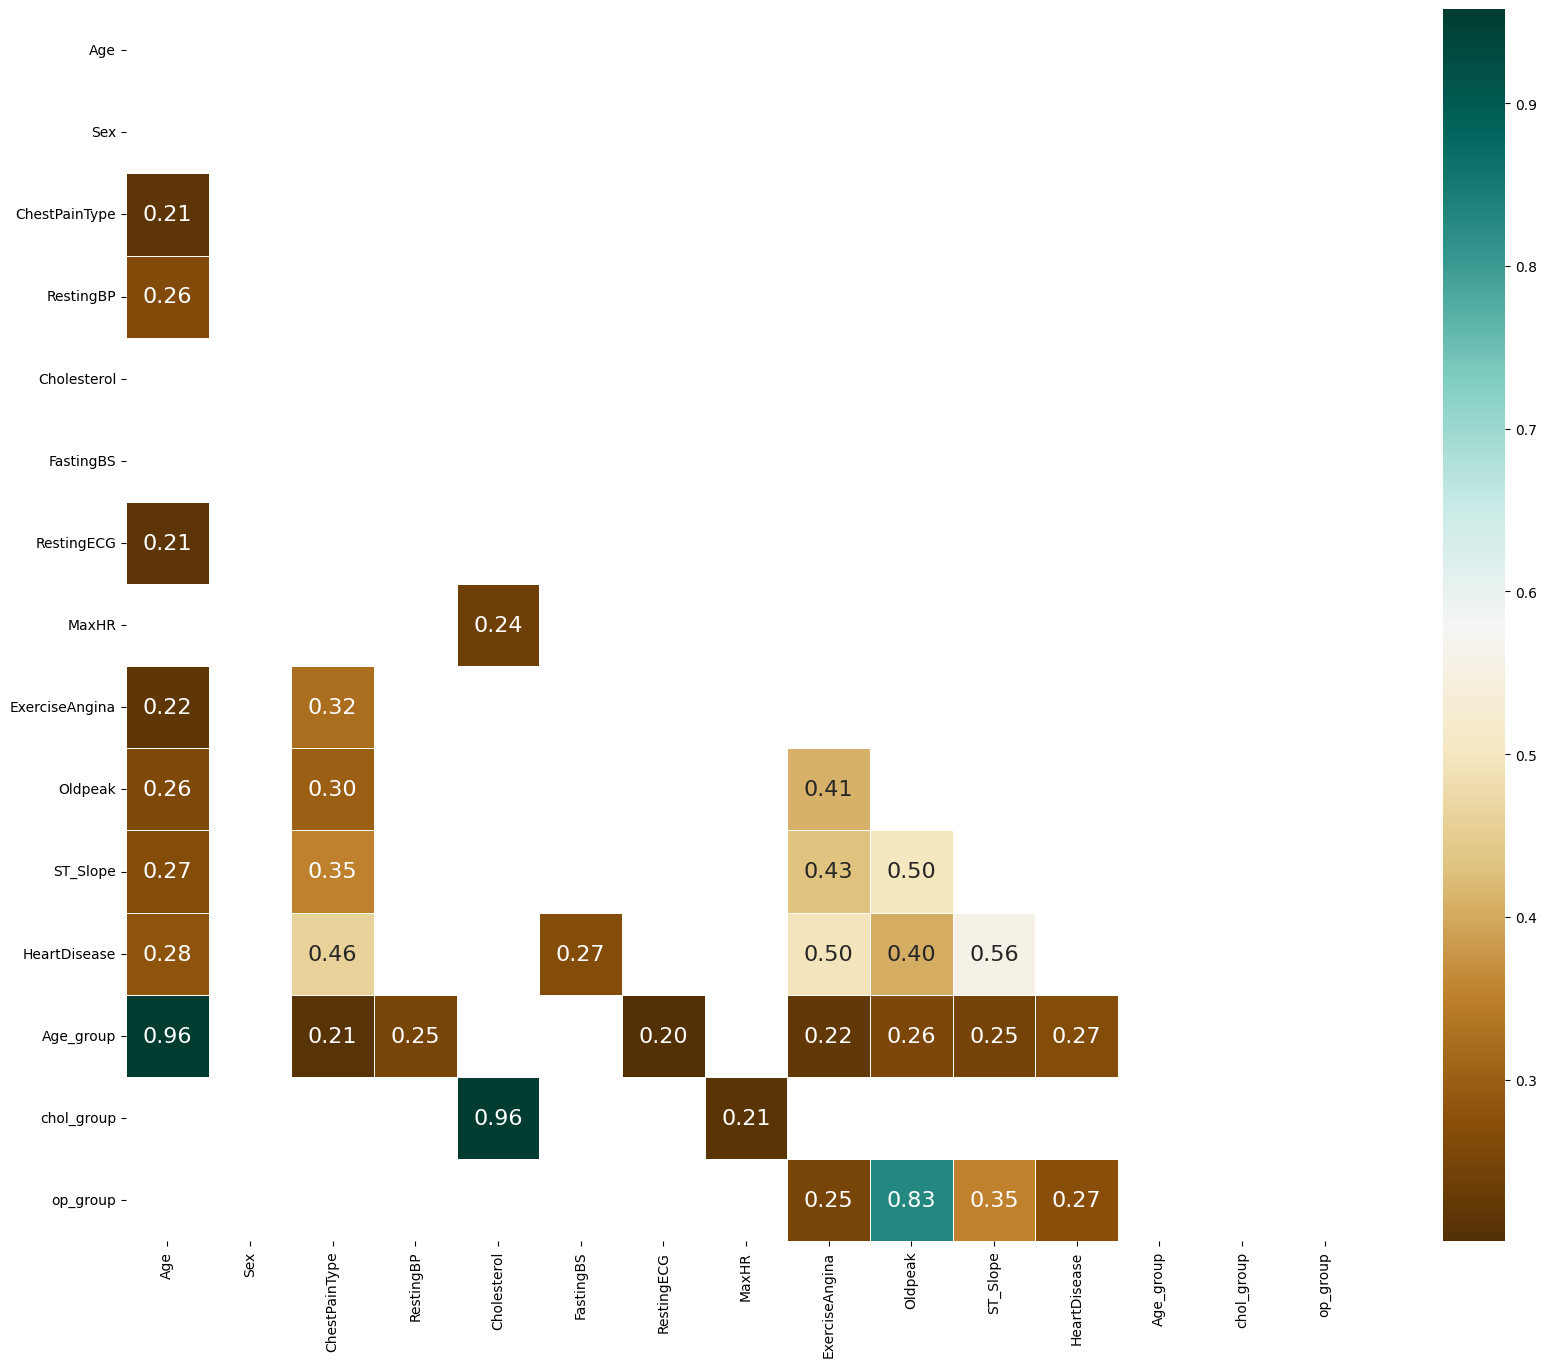

In [38]:
#positive 상관관계 0.2 이상
plt.figure(figsize=(20, 16))

sns.heatmap(df_corr_pos, annot=True, mask=mask,cmap='BrBG', linewidths=.6, fmt='.2f', annot_kws={'size':16})
plt.show()


<양의 상관관계 분석 결과>
- 'ST_Slope' : 0.56, 'ExerciseAnina' : 0.5,'ChestPainType' : 0.45, 'Oldpeak' : 0.4 , 순으로 큰 양의 상관관계를 가짐
- 1. ST segement의 기울기가 down인 환자일수록 심장질환 보유자가 많다.
- 2. 운동성 협심증을 가진 환자일수록 심장질환 보유자가 많다.
- 3. 흉통유형이 TA 일반협심증인 환자일수록 심장질환 보유자가 많다.
- 4. ST 세그먼트 하강 정도가 큰 환자일수록 심장질환 보유자가 많다.

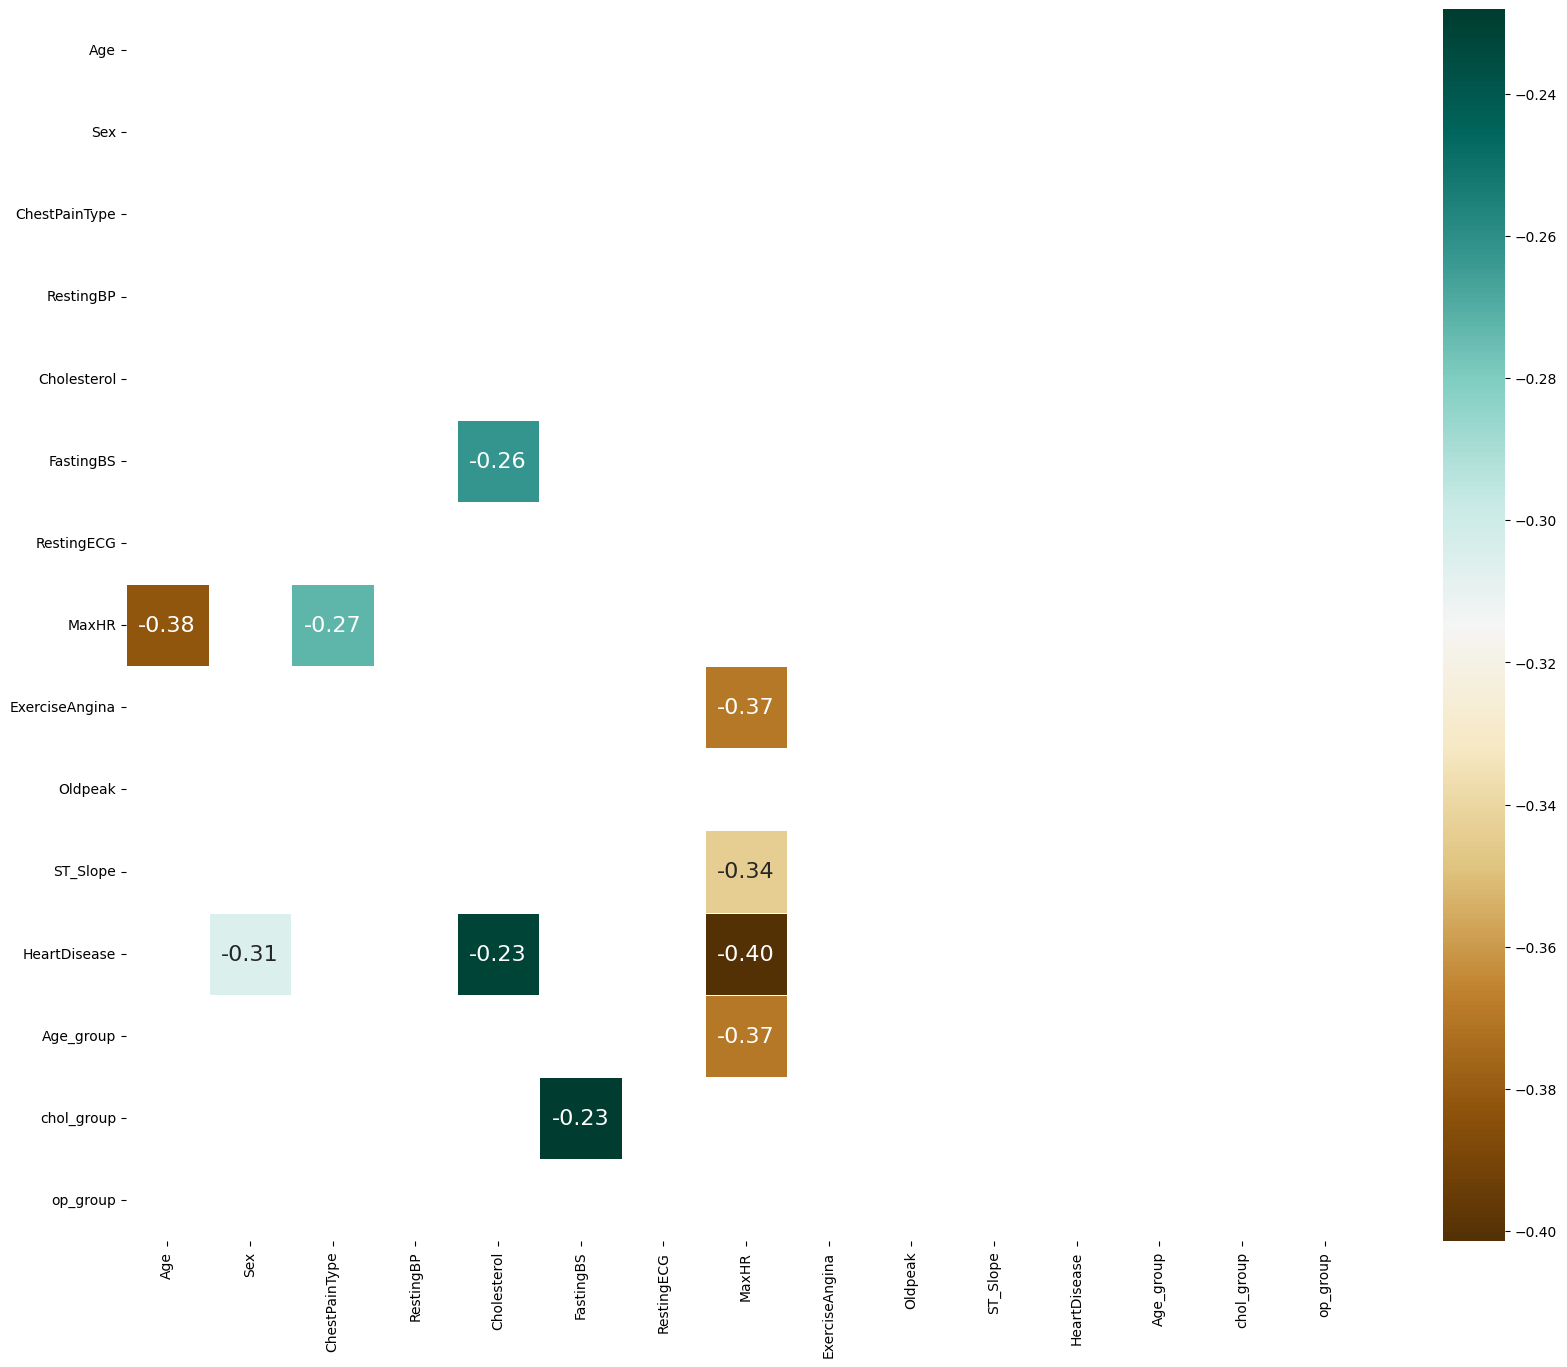

In [39]:
# Negative 상관관계 -0.2 이하
plt.figure(figsize=(20, 16))

sns.heatmap(df_corr_neg, annot=True, mask=mask,cmap='BrBG', linewidths=.6, fmt='.2f', annot_kws={'size':16})
plt.show()

<음의 상관 관계 분석 결과>
- 'MaxHR' : -0.4, 'Sex' : -0.31, 'Cholesterol' : -0.23 순으로 큰 음의 상관관계를 가짐
- 1. 최대심박수가 낮은 환자일수록 심장질환 보유자가 많다.
- 2. 남성 환자일수록 심장질환 보유자가 많다.
- 3. 콜레스테롤 수치가 낮은 환자일수록 심장질환 보유자가 많다.

In [40]:
#최종으로 상관계수 높은 변수 확인
df_corr.sort_values(by='HeartDisease', ascending=False)[['HeartDisease']]

HeartDisease
HeartDisease        1.000000
ST_Slope            0.558541
ExerciseAngina      0.495490
ChestPainType       0.459810
Oldpeak             0.403638
Age                 0.282012
op_group            0.274446
Age_group           0.268165
FastingBS           0.267994
RestingBP           0.117990
RestingECG          0.061791
chol_group         -0.198737
Cholesterol        -0.231479
Sex                -0.305118
MaxHR              -0.401410

### 결론

전처리랑 EDA까지 진행한 결과, 종속변수가 0과 1의 발병여부를 나타내므로 추후 로지스틱 회귀분석을 통해 11가지 특징들로 심장질환 발병 여부를 예측할 수 있을 것입니다.